# Задача 5

Провести интерполяционный полином $P_n(x)$ через точки 

$$ x_k = 1 + \frac{k}{n}, y_k = \ln{x_k}, k = 0, ....,n. $$

при $n = 4, ..., 15$. Нарисовать графики  $P_n(x) - \ln{x}$

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
import math

Задам функцию, которую буду аппроксимировать.

In [2]:
def y(xk):
    return [math.log(i) for i in xk]

Задам функции для вычисления точек.

In [3]:
def x(n):
    xk = []
    for k in range(0, n + 1, 1):
        xk.append(1 + float(k) / n)
    return xk

In [4]:
n = 50
X = np.arange(1, 2.01, 0.01)
P_Lag = []
P_New = []
Ln = [math.log(i) for i in X]

### 1. Полиномы Лагранжа

$$l_i(x) = \prod_{0 \leq j \leq n, j \neq i}{(x-x_j)}$$

$$ P_n(x) = \sum_{i = 0}^{n}{y(x_i) \cdot \frac{l_i(x)}{l_i(x_i)}} $$

Время вычисления $P_n(x)$ для одного $x$: $\approx \mathcal{O}(n_2)$

Определю функции для вычисления полиномов Лагранжа:

In [5]:
def l(x, xk, i, n):
    l = 1
    for j in range(0, n + 1):
        if j == i:
            continue
        l *= (x - xk[j])
    return l

In [6]:
def Lagrange(x, xk, n):
    P = 0
    lx = []
    lk = []
    yk = y(xk)
    for i in range(0, n + 1):
        lx.append(l(x, xk, i, n))
    for i in range(0, n + 1):
        lk.append(l(xk[i], xk, i, n))
    for i in range(0, n + 1):
        P += yk[i] * lx[i] / lk[i]
    return P

In [7]:
start = time()
for i in range(4, n + 1):
    P_Lag.append([Lagrange(j, x(i), i) for j in X])


eps_L = []
for i in range(n - 3):
    eps_L.append([(P_Lag[i][j] - Ln[j]) for j in range(0, len(X))])
print(time()-start)

3.1950998306274414


### 2. Полиномы Ньютона

$$P(x) = P(x_0) + \sum_{k=1}^{n}P(x_0, x_1, ..., x_k)\prod_{j=0}^{k-1}(x - x_j)$$

Разделенные разности для полиномов $P(x_0, x_1, ..., x_k)$ совпадают с разделенными разностями для интерполируемой функции $y(x)$ поскольку $P(x_i) = y(x_i)$. Следовательно интерполяционный полином: 

$$P(x) = y(x_0) + \sum_{k=1}^{n}y(x_0, x_1, ..., x_k)\prod_{j=0}^{k-1}(x - x_j)$$

A разделенная разность представима в виде 

$$y(x_0, x_1, ...., x_k) = \sum_{i=0}^{k}{\frac{y(x_i)}{\prod_{j\neq i}{(x_i - x_j)}}}$$

Определю метод для вычисления разделенных сумм и заранее "заготовлю" все необходимые разделенные суммы для вычисления полиномов Ньютона для заданных $n$.

Определю функцию для вычисления полиномов Ньютона:

In [8]:
def divided_difference(xk, k):
    Y = [xk, y(xk)]
    n = 0
    for i in range(2, k + 2):
        try:
            Y.append(
                [(Y[i - 1][j] - Y[i - 1][j + 1]) / (Y[0][j] - Y[0][j + 1 + n]) for j in range(0, len(Y[i - 1]) - 1)])
        except IndexError:
            n += 1
            continue
        n += 1
    return Y

In [9]:
def Newton(x, xk, n):
    Y = divided_difference(xk, n)
    P = Y[1][0]
    X = 1
    for k in range(1, n + 1):
        for j in range(0, k):
            X *= (x - xk[j])
        P += X * Y[k + 1][0]
        X = 1
    return P

In [10]:
start = time()
eps_N = []
for i in range(4, n + 1):
    P_New.append([Newton(j, x(i), i) for j in X])


for i in range(n - 3):
    eps_N.append([(P_New[i][j] - Ln[j]) for j in range(0, len(X))])
print(time()-start)

2.9412806034088135


### 3. Графики

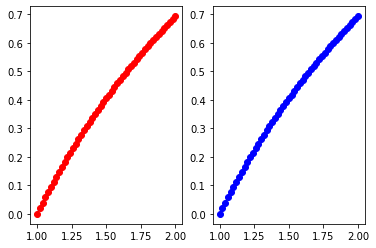

In [11]:
eps = []
for j in range(n - 3):
    eps.append([abs(eps_N[j][i]) - abs(eps_L[j][i]) for i in range(len(eps_N[j]))])

fig, axes = plt.subplots(1, 2)
Xk = x(n)
Yk = y(Xk)
axes[0].plot(X, P_New[n - 4])
axes[0].plot(Xk, Yk, 'ro')
axes[1].plot(X, P_Lag[n - 4])
axes[1].plot(Xk, Yk, 'bo')
plt.show()